# Data Analysis by Type in the _ Period

In [1]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Question: Is the average existence span and length correlated...?

The order of the geological periods, from oldest to most recent, are the Triassic (251 - 201 million years ago), Jurassic (201 - 145 million years ago) and Cretaceous (145 - 66 million years ago)

In [2]:
dino_data = pd.read_csv('dino_data_cleaned.csv', index_col=0)  
dino_data.head()

,name,diet,period,lived in,type,length,species,link,start year (mil. years ago),end year (mil. years ago),existance span (mil. years)
0,aardonyx,herbivorous,Early Jurassic,South Africa,sauropod,8.0,celestae,https://www.nhm.ac.uk/discover/dino-directory/...,199,189,10
1,abelisaurus,carnivorous,Late Cretaceous,Argentina,large theropod,9.0,comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...,74,70,4
2,achelousaurus,herbivorous,Late Cretaceous,USA,ceratopsian,6.0,horneri,https://www.nhm.ac.uk/discover/dino-directory/...,83,70,13
3,achillobator,carnivorous,Late Cretaceous,Mongolia,large theropod,5.0,giganteus,https://www.nhm.ac.uk/discover/dino-directory/...,99,84,15
4,acrocanthosaurus,carnivorous,Early Cretaceous,USA,large theropod,12.0,atokensis,https://www.nhm.ac.uk/discover/dino-directory/...,115,105,10


In [3]:
# correcting end years to equal their respective start years if it is 0

In [4]:
num_rows_with_zero_end_year = len(dino_data[dino_data['end year (mil. years ago)'] == 0])
print("Number of rows where end year is 0:", num_rows_with_zero_end_year)

Number of rows where end year is 0: 28


In [5]:
# replacing these 0s with the value in its start years value
dino_data.loc[dino_data['end year (mil. years ago)'] == 0, 'end year (mil. years ago)'] = dino_data['start year (mil. years ago)']

# checking for correction
num_rows_with_zero_end_year = len(dino_data[dino_data['end year (mil. years ago)'] == 0])
print("Number of rows where end year is 0:", num_rows_with_zero_end_year)
num_rows_with_zero_start_year = len(dino_data[dino_data['start year (mil. years ago)'] == 0])
print("Number of rows where start year is 0:", num_rows_with_zero_start_year)

Number of rows where end year is 0: 2
Number of rows where start year is 0: 2


In [6]:
# removing data with invalid start date (0)
dino_data = dino_data[dino_data['start year (mil. years ago)'] != 0]
num_rows_with_zero_end_year = len(dino_data[dino_data['end year (mil. years ago)'] == 0])
print("Number of rows where end year is 0:", num_rows_with_zero_end_year)
num_rows_with_zero_start_year = len(dino_data[dino_data['start year (mil. years ago)'] == 0])
print("Number of rows where start year is 0:", num_rows_with_zero_start_year)

Number of rows where end year is 0: 0
Number of rows where start year is 0: 0


In [7]:
# creating average existence year column
dino_data['average_existence_year'] = dino_data[['start year (mil. years ago)', 'end year (mil. years ago)']].mean(axis=1)
dino_data.head()

,name,diet,period,lived in,type,length,species,link,start year (mil. years ago),end year (mil. years ago),existance span (mil. years),average_existence_year
0,aardonyx,herbivorous,Early Jurassic,South Africa,sauropod,8.0,celestae,https://www.nhm.ac.uk/discover/dino-directory/...,199,189,10,194.0
1,abelisaurus,carnivorous,Late Cretaceous,Argentina,large theropod,9.0,comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...,74,70,4,72.0
2,achelousaurus,herbivorous,Late Cretaceous,USA,ceratopsian,6.0,horneri,https://www.nhm.ac.uk/discover/dino-directory/...,83,70,13,76.5
3,achillobator,carnivorous,Late Cretaceous,Mongolia,large theropod,5.0,giganteus,https://www.nhm.ac.uk/discover/dino-directory/...,99,84,15,91.5
4,acrocanthosaurus,carnivorous,Early Cretaceous,USA,large theropod,12.0,atokensis,https://www.nhm.ac.uk/discover/dino-directory/...,115,105,10,110.0


#### Which types correlated with what diets? 

In [8]:
type_diet_count = dino_data.groupby('type')['diet'].value_counts().unstack(fill_value=0)
type_diet_count

diet,carnivorous,herbivorous,herbivorous/omnivorous,omnivorous,unknown
type,,,,,
armoured dinosaur,0,29,0,0,0
ceratopsian,0,24,0,0,0
euornithopod,0,53,0,0,0
large theropod,50,1,0,7,0
sauropod,0,60,1,5,0
small theropod,42,1,0,14,1


In [9]:
# cleaning out outlier datapoints

# replacing 'herbivorous/omnivorous' with 'omnivorous' in diet column
dino_data['diet'] = dino_data['diet'].replace(['herbivorous/omnivorous'], 'omnivorous')

# removing dinos with 'unknown' as diet
dino_data = dino_data[dino_data['diet'] != 'unknown']

In [10]:
type_diet_count = dino_data.groupby('type')['diet'].value_counts().unstack(fill_value=0)
type_diet_count

diet,carnivorous,herbivorous,omnivorous
type,,,
armoured dinosaur,0,29,0
ceratopsian,0,24,0
euornithopod,0,53,0
large theropod,50,1,7
sauropod,0,60,6
small theropod,42,1,14


The dinosaur type of armoured dinosaur, ceratopsian, euornithopod, and sauropod are mainly herbivorous, whereas the large theropod and small theropods are mainly carnivorous.

### among carnivores in their respective periods?

For carnivores, we will focus on analyzing large therapods and small therapods.

In [11]:
# obtaining the respective dataframes for carnivorous types
carn_l_theropod_df = dino_data[(dino_data['type'] == 'large theropod') & (dino_data['diet'] == 'carnivorous')]
carn_s_theropod_df = dino_data[(dino_data['type'] == 'small theropod') & (dino_data['diet'] == 'carnivorous')]

In [12]:
carn_l_theropod_df.head()

,name,diet,period,lived in,type,length,species,link,start year (mil. years ago),end year (mil. years ago),existance span (mil. years),average_existence_year
1,abelisaurus,carnivorous,Late Cretaceous,Argentina,large theropod,9.0,comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...,74,70,4,72.0
3,achillobator,carnivorous,Late Cretaceous,Mongolia,large theropod,5.0,giganteus,https://www.nhm.ac.uk/discover/dino-directory/...,99,84,15,91.5
4,acrocanthosaurus,carnivorous,Early Cretaceous,USA,large theropod,12.0,atokensis,https://www.nhm.ac.uk/discover/dino-directory/...,115,105,10,110.0
6,afrovenator,carnivorous,Early Cretaceous,Niger,large theropod,9.0,abakensis,https://www.nhm.ac.uk/discover/dino-directory/...,132,121,11,126.5
10,albertosaurus,carnivorous,Late Cretaceous,Canada,large theropod,9.0,libratus,https://www.nhm.ac.uk/discover/dino-directory/...,76,74,2,75.0


In [45]:
# counting how many of the herbivorous types

array_carnivores = [carn_l_theropod_df, carn_s_theropod_df]
for df in array_carnivores:
    total = str(df.shape[0])
    dino_type = str(df['type'].iloc[0]) 
    max_start_year = df['start year (mil. years ago)'].max()
    min_end_year = df['end year (mil. years ago)'].min()
    print("There are " + total + " carnivorous " + dino_type + ".")
    print("Maximum start year of carnivorous " + dino_type + " (mil. years ago):", max_start_year)
    print("Minimum end year of carnivorous " + dino_type + " (mil. years ago):", min_end_year)
    print("\n")

There are 50 carnivorous large theropod.
Maximum start year of carnivorous large theropod (mil. years ago): 227
Minimum end year of carnivorous large theropod (mil. years ago): 65


There are 42 carnivorous small theropod.
Maximum start year of carnivorous small theropod (mil. years ago): 228
Minimum end year of carnivorous small theropod (mil. years ago): 65




So, we will have the comparison of length vs. existence span of carnivorous be from 227 million years ago to 65 million years ago.

In [171]:
# defining the boundaries of the geological periods
triassic_start = 228
triassic_end = 201
jurassic_start = 201
jurassic_end = 145
cretaceous_start = 145
cretaceous_end = 65

#### For carnivorous large theropods

/Users/BeneenFune/miniconda3/envs/cms/lib/python3.9/site-packages/scikit_learn-1.2.1-py3.9-macosx-10.9-x86_64.egg/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/BeneenFune/miniconda3/envs/cms/lib/python3.9/site-packages/scikit_learn-1.2.1-py3.9-macosx-10.9-x86_64.egg/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



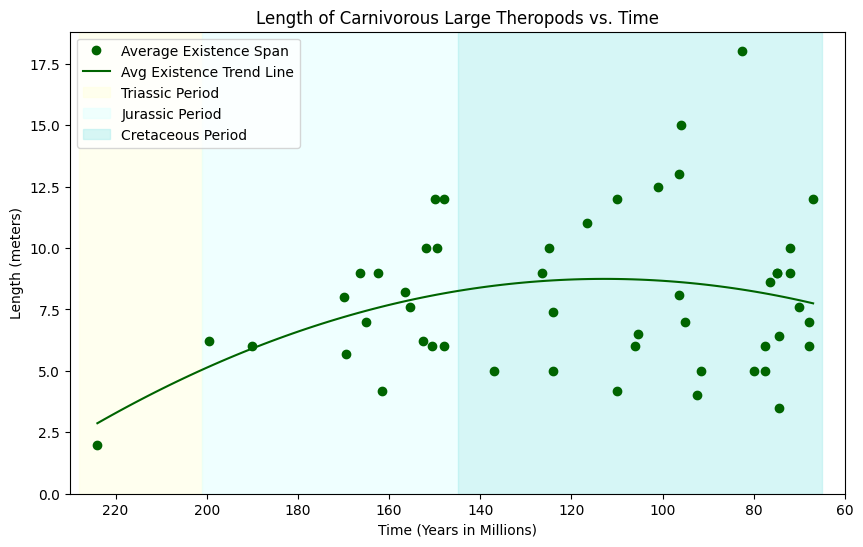

In [172]:
# refining data
c_l_th_length = carn_l_theropod_df['length']
c_l_th_avg = carn_l_theropod_df['average_existence_year']

# fit poly regression model for average existence year
degree = 2
c_l_th_avg_poly = PolynomialFeatures(degree=degree).fit_transform(np.array(c_l_th_avg).reshape(-1, 1))
c_l_th_avg_model = LinearRegression().fit(c_l_th_avg_poly, c_l_th_length)

# calculate predictions for start and end dates
c_l_th_avg_predictions = c_l_th_avg_model.predict(c_l_th_avg_poly)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(c_l_th_avg, c_l_th_length, 'o', color='darkgreen', label='Average Existence Span')

# calculating trendline
c_l_th_avg_line = np.linspace(c_l_th_avg.min(), c_l_th_avg.max(), 100)
c_l_th_avg_line_poly = PolynomialFeatures(degree=degree).fit_transform(c_l_th_avg_line.reshape(-1, 1))
c_l_th_avg_trend = c_l_th_avg_model.predict(c_l_th_avg_line_poly)

# plotting trendlines
plt.plot(c_l_th_avg_line, c_l_th_avg_trend, '-', color='darkgreen',label='Avg Existence Trend Line')

# highlighting the periods
plt.axvspan(triassic_start, triassic_end, color='lightyellow', alpha=0.5, label='Triassic Period')
plt.axvspan(jurassic_start, jurassic_end, color='lightcyan', alpha=0.5, label='Jurassic Period')
plt.axvspan(cretaceous_start, cretaceous_end, color='paleturquoise', alpha=0.5, label='Cretaceous Period')

# labelling
plt.xlabel('Time (Years in Millions)')
plt.ylabel('Length (meters)')
plt.title('Length of Carnivorous Large Theropods vs. Time')
plt.grid(False)
plt.legend()
plt.ylim(bottom=0)  
plt.xlim(60, 230)  
plt.gca().invert_xaxis()  
plt.show()


In [29]:
# creating the scatter plot
c_l_th_fig = px.scatter(carn_l_theropod_df, x="average_existence_year", y="length", color="existance span (mil. years)",
                 title="Length of Carnivorous Large Theropods vs. Time", color_continuous_scale='Bluered')

# updating axes
c_l_th_fig.update_xaxes(title_text="Time (Years in Millions)", autorange="reversed")
c_l_th_fig.update_yaxes(title_text="Length")
c_l_th_fig.update_coloraxes(colorbar_title="Existence Span (mil. years)")

c_l_th_fig.show()


#### For carnivorous small theropods

/Users/BeneenFune/miniconda3/envs/cms/lib/python3.9/site-packages/scikit_learn-1.2.1-py3.9-macosx-10.9-x86_64.egg/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/BeneenFune/miniconda3/envs/cms/lib/python3.9/site-packages/scikit_learn-1.2.1-py3.9-macosx-10.9-x86_64.egg/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



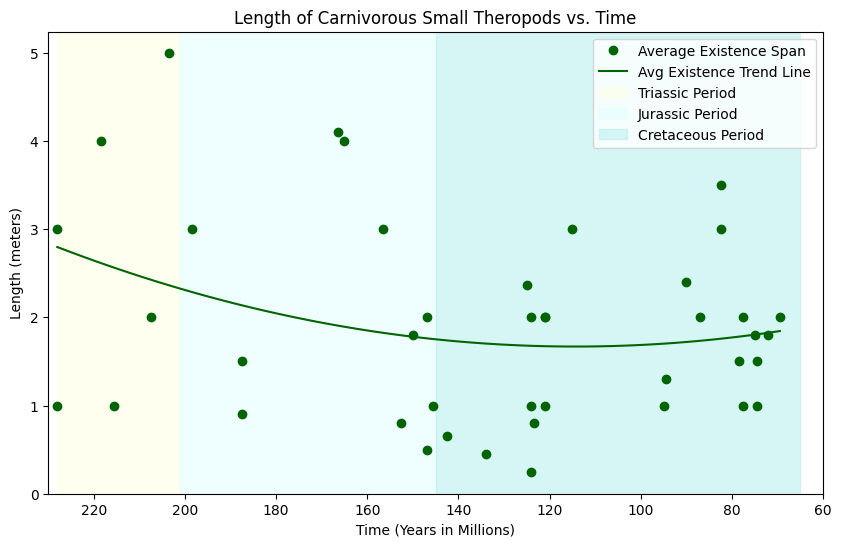

In [173]:
# refining data
c_s_th_length = carn_s_theropod_df['length']
c_s_th_avg = carn_s_theropod_df['average_existence_year']

# fit poly regression model for average existence year
degree = 2
c_s_th_avg_poly = PolynomialFeatures(degree=degree).fit_transform(np.array(c_s_th_avg).reshape(-1, 1))
c_s_th_avg_model = LinearRegression().fit(c_s_th_avg_poly, c_s_th_length)

# calculate predictions for start and end dates
c_s_th_avg_predictions = c_s_th_avg_model.predict(c_s_th_avg_poly)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(c_s_th_avg, c_s_th_length, 'o', color='darkgreen', label='Average Existence Span')

# calculating trendline
c_s_th_avg_line = np.linspace(c_s_th_avg.min(), c_s_th_avg.max(), 100)
c_s_th_avg_line_poly = PolynomialFeatures(degree=degree).fit_transform(c_s_th_avg_line.reshape(-1, 1))
c_s_th_avg_trend = c_s_th_avg_model.predict(c_s_th_avg_line_poly)

# plotting trendlines
plt.plot(c_s_th_avg_line, c_s_th_avg_trend, '-', color='darkgreen', label='Avg Existence Trend Line')

# highlighting the periods
plt.axvspan(triassic_start, triassic_end, color='lightyellow', alpha=0.5, label='Triassic Period')
plt.axvspan(jurassic_start, jurassic_end, color='lightcyan', alpha=0.5, label='Jurassic Period')
plt.axvspan(cretaceous_start, cretaceous_end, color='paleturquoise', alpha=0.5, label='Cretaceous Period')

# labelling
plt.xlabel('Time (Years in Millions)')
plt.ylabel('Length (meters)')
plt.title('Length of Carnivorous Small Theropods vs. Time')
plt.grid(False)
plt.legend()
plt.ylim(bottom=0)  
plt.xlim(60, 230)  
plt.gca().invert_xaxis()  
plt.show()

In [21]:
# creating the scatter plot
c_s_th_fig = px.scatter(carn_s_theropod_df, x="average_existence_year", y="length", color="existance span (mil. years)",
                 title="Length of Carnivorous Small Theropods vs. Time", color_continuous_scale='Bluered')

# updating axes
c_s_th_fig.update_xaxes(title_text="Time (Years in Millions)", autorange="reversed")
c_s_th_fig.update_yaxes(title_text="Length")
c_s_th_fig.update_coloraxes(colorbar_title="Existence Span (mil. years)")

c_s_th_fig.show()

#### all carnivorous types

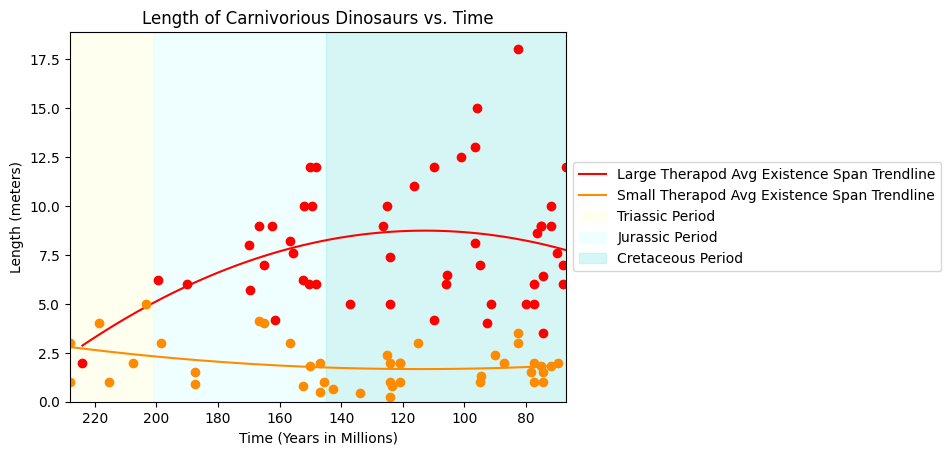

In [192]:
# plotting trendlines
plt.plot(c_l_th_avg_line, c_l_th_avg_trend, '-', color='red',label='Large Therapod Avg Existence Span Trendline')
plt.plot(c_l_th_avg, c_l_th_length, 'o', color='red')
plt.plot(c_s_th_avg_line, c_s_th_avg_trend, '-', color='darkorange',label='Small Therapod Avg Existence Span Trendline')
plt.plot(c_s_th_avg, c_s_th_length, 'o', color='darkorange',)

# highlighting the periods
plt.axvspan(triassic_start, triassic_end, color='lightyellow', alpha=0.5, label='Triassic Period')
plt.axvspan(jurassic_start, jurassic_end, color='lightcyan', alpha=0.5, label='Jurassic Period')
plt.axvspan(cretaceous_start, cretaceous_end, color='paleturquoise', alpha=0.5, label='Cretaceous Period')

# labelling
plt.xlabel('Time (Years in Millions)')
plt.ylabel('Length (meters)')
plt.title('Length of Carnivorious Dinosaurs vs. Time')
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(bottom=0)  
plt.xlim(67, 228)  
plt.gca().invert_xaxis()  
plt.show()

In [37]:
# Color Scale Scatterplot reference - DO NOT INCLUDE
# Combining the plots
combined_fig = c_l_th_fig
combined_fig.add_traces(c_s_th_fig.data)
combined_fig.update_layout(title="Length of Carnivorous Dinosaurs vs. Time")

# Show the combined plot
combined_fig.show()

### among herbivores in their respective periods?

In [38]:
# obtaining the respective dataframes for herbivorous types
arm_dino_df = dino_data[(dino_data['type'] == 'armoured dinosaur') & (dino_data['diet'] == 'herbivorous')]
cera_df = dino_data[(dino_data['type'] == 'ceratopsian') & (dino_data['diet'] == 'herbivorous')]
euor_df = dino_data[(dino_data['type'] == 'euornithopod') & (dino_data['diet'] == 'herbivorous')]
saur_df = dino_data[(dino_data['type'] == 'sauropod') & (dino_data['diet'] == 'herbivorous')]

In [40]:
arm_dino_df.head()

,name,diet,period,lived in,type,length,species,link,start year (mil. years ago),end year (mil. years ago),existance span (mil. years),average_existence_year
21,ankylosaurus,herbivorous,Late Cretaceous,USA,armoured dinosaur,7.0,magniventris,https://www.nhm.ac.uk/discover/dino-directory/...,74,67,7,70.5
56,cedarpelta,herbivorous,Early Cretaceous,USA,armoured dinosaur,10.0,bilbeyhallorum,https://www.nhm.ac.uk/discover/dino-directory/...,142,127,15,134.5
67,chungkingosaurus,herbivorous,Late Jurassic,China,armoured dinosaur,4.0,jiangbeiensis,https://www.nhm.ac.uk/discover/dino-directory/...,159,142,17,150.5
77,dacentrurus,herbivorous,Late Jurassic,United Kingdom,armoured dinosaur,6.0,armatus,https://www.nhm.ac.uk/discover/dino-directory/...,154,150,4,152.0
90,edmontonia,herbivorous,Late Cretaceous,Canada,armoured dinosaur,4.0,longiceps,https://www.nhm.ac.uk/discover/dino-directory/...,76,74,2,75.0


In [163]:
# counting how many of the herbivorous types

array_herbivores = [saur_df, arm_dino_df, euor_df, cera_df]
for df in array_herbivores:
    total = str(df.shape[0])
    dino_type = str(df['type'].iloc[0]) 
    max_start_year = df['start year (mil. years ago)'].max()
    min_end_year = df['end year (mil. years ago)'].min()
    print("There are " + total + " herbivorous " + dino_type + ".")
    print("Maximum start year of herbivorous " + dino_type + " (mil. years ago):", max_start_year)
    print("Minimum end year of herbivorous " + dino_type + " (mil. years ago):", min_end_year)
    print("\n")

There are 60 herbivorous sauropod.
Maximum start year of herbivorous sauropod (mil. years ago): 221
Minimum end year of herbivorous sauropod (mil. years ago): 65


There are 29 herbivorous armoured dinosaur.
Maximum start year of herbivorous armoured dinosaur (mil. years ago): 208
Minimum end year of herbivorous armoured dinosaur (mil. years ago): 67


There are 53 herbivorous euornithopod.
Maximum start year of herbivorous euornithopod (mil. years ago): 205
Minimum end year of herbivorous euornithopod (mil. years ago): 65


There are 24 herbivorous ceratopsian.
Maximum start year of herbivorous ceratopsian (mil. years ago): 159
Minimum end year of herbivorous ceratopsian (mil. years ago): 65




So, we will have the comparison of length vs. existence span of herbivorous be from 221 million years ago to 65 million years ago.

#### For herbivorous armoured dinosaurs, ceratopsians, euornithopods, and sauropods

/Users/BeneenFune/miniconda3/envs/cms/lib/python3.9/site-packages/scikit_learn-1.2.1-py3.9-macosx-10.9-x86_64.egg/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/BeneenFune/miniconda3/envs/cms/lib/python3.9/site-packages/scikit_learn-1.2.1-py3.9-macosx-10.9-x86_64.egg/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



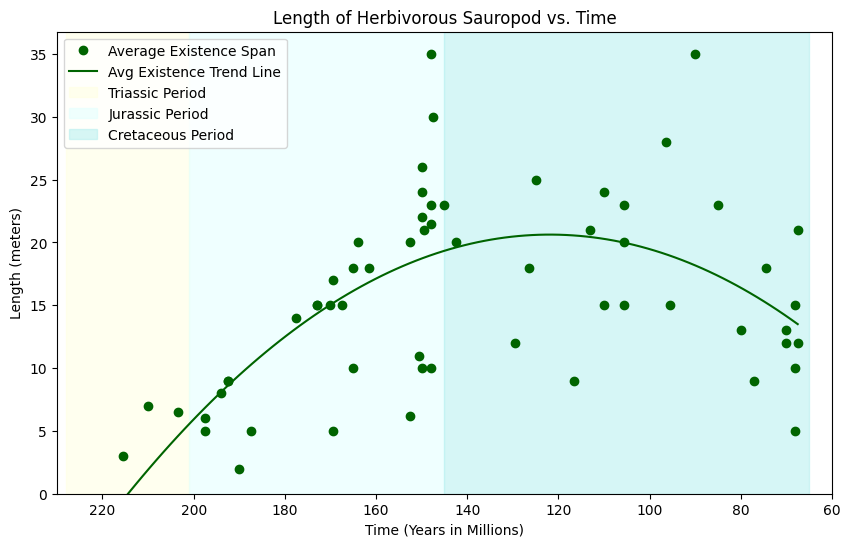

/Users/BeneenFune/miniconda3/envs/cms/lib/python3.9/site-packages/scikit_learn-1.2.1-py3.9-macosx-10.9-x86_64.egg/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/BeneenFune/miniconda3/envs/cms/lib/python3.9/site-packages/scikit_learn-1.2.1-py3.9-macosx-10.9-x86_64.egg/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



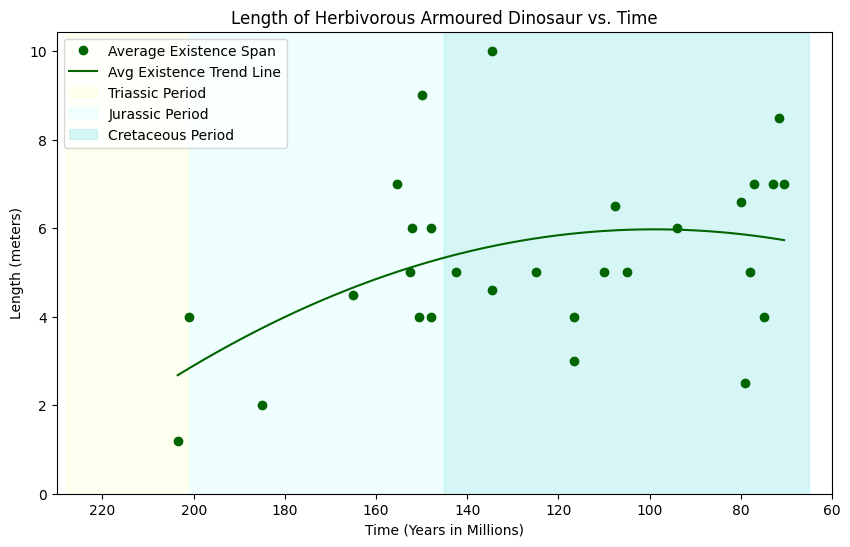

/Users/BeneenFune/miniconda3/envs/cms/lib/python3.9/site-packages/scikit_learn-1.2.1-py3.9-macosx-10.9-x86_64.egg/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/BeneenFune/miniconda3/envs/cms/lib/python3.9/site-packages/scikit_learn-1.2.1-py3.9-macosx-10.9-x86_64.egg/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



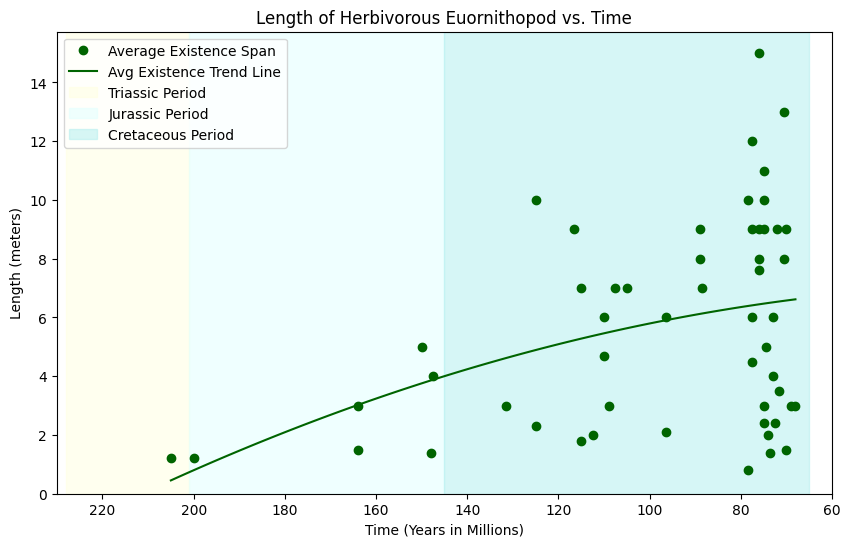

/Users/BeneenFune/miniconda3/envs/cms/lib/python3.9/site-packages/scikit_learn-1.2.1-py3.9-macosx-10.9-x86_64.egg/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/BeneenFune/miniconda3/envs/cms/lib/python3.9/site-packages/scikit_learn-1.2.1-py3.9-macosx-10.9-x86_64.egg/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



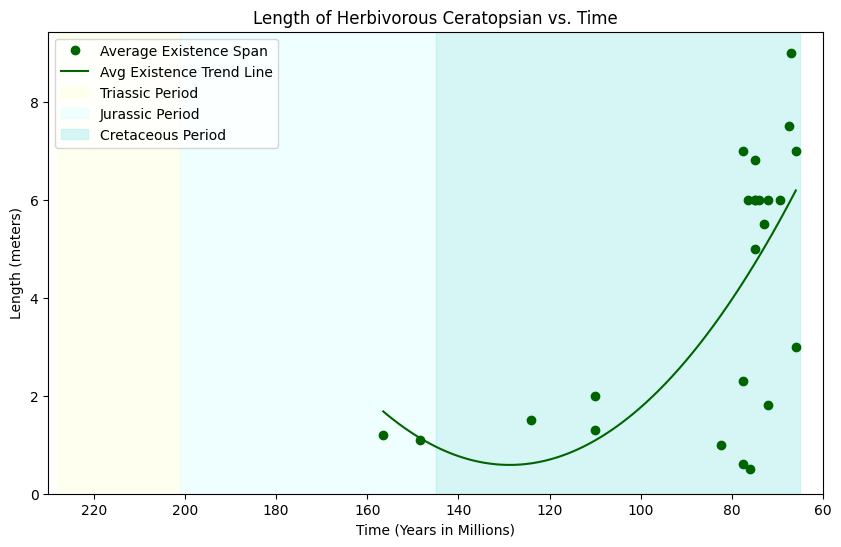

In [195]:
# for trendline scatterplot graphs

# initializing lists to store variables
avg_list = []
length_list = []
avg_line_list = []
avg_trend_list = []

for df in array_herbivores:
    
    # refining data
    length = df['length']
    avg = df['average_existence_year']

    # fit poly regression model for average existence year
    degree = 2
    avg_poly = PolynomialFeatures(degree=degree).fit_transform(np.array(avg).reshape(-1, 1))
    avg_model = LinearRegression().fit(avg_poly, length)

    # calculate predictions for start and end dates
    avg_predictions = avg_model.predict(avg_poly)

    # plotting
    plt.figure(figsize=(10, 6))
    plt.plot(avg, length, 'o', color='darkgreen', label='Average Existence Span')

    # calculating trendline
    avg_line = np.linspace(avg.min(), avg.max(), 100)
    avg_line_poly = PolynomialFeatures(degree=degree).fit_transform(avg_line.reshape(-1, 1))
    avg_trend = avg_model.predict(avg_line_poly)

    # plotting trendlines
    plt.plot(avg_line, avg_trend, '-', color='darkgreen', label='Avg Existence Trend Line')
    
    # saving variables to lists
    avg_list.append(avg)
    length_list.append(length)
    avg_line_list.append(avg_line)
    avg_trend_list.append(avg_trend)
    
    # title string prep
    dino_title = str(df['type'].iloc[0]).title()
    
    
    # highlighting the periods
    plt.axvspan(triassic_start, triassic_end, color='lightyellow', alpha=0.5, label='Triassic Period')
    plt.axvspan(jurassic_start, jurassic_end, color='lightcyan', alpha=0.5, label='Jurassic Period')
    plt.axvspan(cretaceous_start, cretaceous_end, color='paleturquoise', alpha=0.5, label='Cretaceous Period')

    # labelling
    plt.xlabel('Time (Years in Millions)')
    plt.ylabel('Length (meters)')
    plt.title('Length of Herbivorous '+dino_title+' vs. Time')
    plt.grid(False)
    plt.legend()
    plt.ylim(bottom=0)  
    plt.xlim(60, 230)  
    plt.gca().invert_xaxis()  
    plt.show()


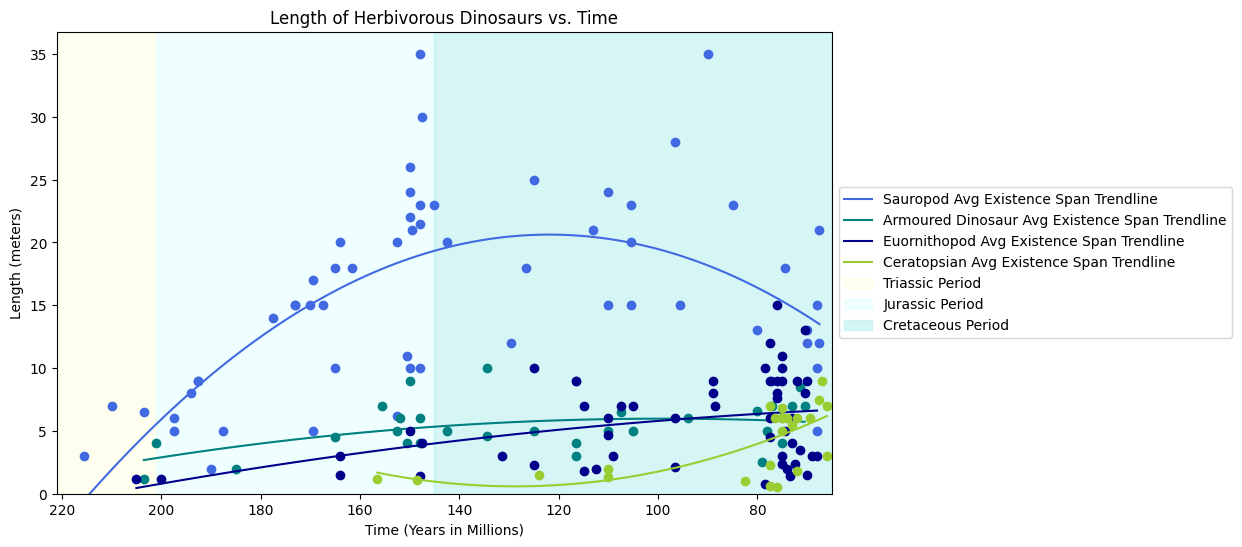

In [166]:
# plotting all herbivore types in trendline scatterplot
colors = ['royalblue','teal','darkblue','yellowgreen']
plt.figure(figsize=(10, 6))
for i in range(len(array_herbivores)):
    
    # initializing color
    color_line = colors[i]
    
    # title string prep
    dino_title = str(array_herbivores[i]['type'].iloc[0]).title()
    
    # plotting the data points
    plt.plot(avg_list[i], length_list[i], 'o', color=color_line)

    # plotting the trendline
    plt.plot(avg_line_list[i], avg_trend_list[i], '-', color=color_line, label=dino_title+" Avg Existence Span Trendline")

plt.axvspan(triassic_start, triassic_end, color='lightyellow', alpha=0.5, label='Triassic Period')
plt.axvspan(jurassic_start, jurassic_end, color='lightcyan', alpha=0.5, label='Jurassic Period')
plt.axvspan(cretaceous_start, cretaceous_end, color='paleturquoise', alpha=0.5, label='Cretaceous Period')

# labelling 
plt.xlabel('Time (Years in Millions)')
plt.ylabel('Length (meters)')
plt.title('Length of Herbivorous Dinosaurs vs. Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(bottom=0)  
plt.xlim(65, 221)  
plt.gca().invert_xaxis()  

plt.show()


In [196]:
# for color scaled scatterplot

for df in array_herbivores:

    # creating the scatter plot
    dino_title = str(df['type'].iloc[0]).title()
    fig = px.scatter(df, x="average_existence_year", y="length", color="existance span (mil. years)",
                     title='Length of Herbivorous '+dino_title+' vs. Time', color_continuous_scale='Bluered')

    # updating axes
    fig.update_xaxes(title_text="Time (Years in Millions)", autorange="reversed")
    fig.update_yaxes(title_text="Length")
    fig.update_coloraxes(colorbar_title="Existence Span (mil. years)")

    fig.show()

#### all dinosaur types

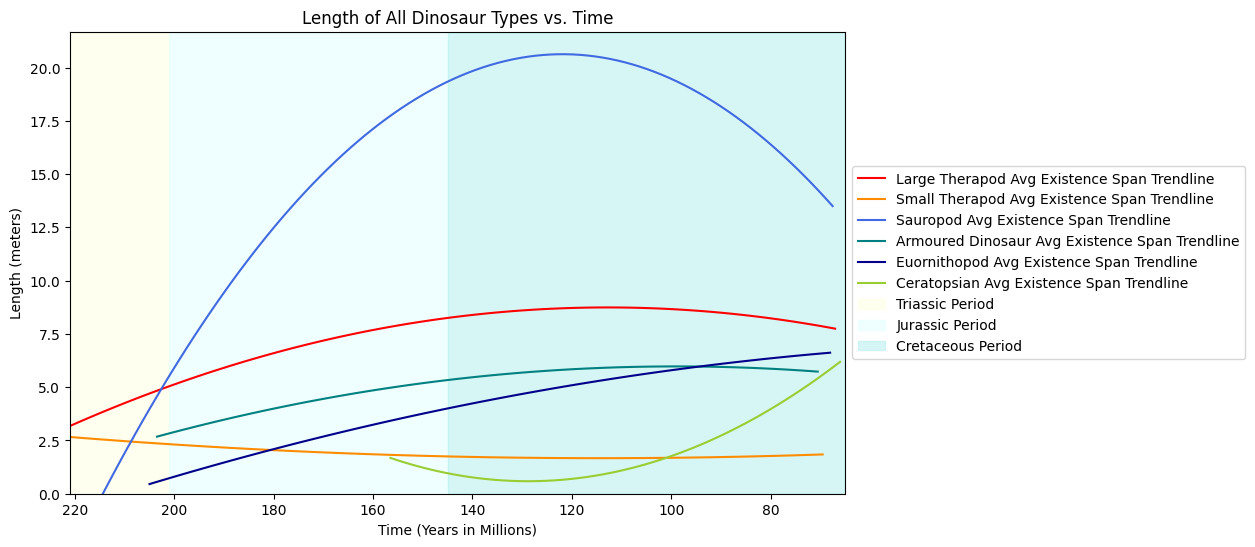

In [167]:
# plotting all dinosaur types in trendline scatterplot

plt.figure(figsize=(10, 6))

# plotting carnivores
plt.plot(c_l_th_avg_line, c_l_th_avg_trend, '-', color='red',label='Large Therapod Avg Existence Span Trendline')
plt.plot(c_s_th_avg_line, c_s_th_avg_trend, '-', color='darkorange',label='Small Therapod Avg Existence Span Trendline')

# plotting herbivores
for i in range(len(array_herbivores)):
    
    # initializing color
    line_color = colors[i]
    
    # title string prep
    dino_title = str(array_herbivores[i]['type'].iloc[0]).title()

    # plotting the trendline
    plt.plot(avg_line_list[i], avg_trend_list[i], '-', color=line_color,label=dino_title+" Avg Existence Span Trendline")

# highlighting the periods
plt.axvspan(triassic_start, triassic_end, color='lightyellow', alpha=0.5, label='Triassic Period')
plt.axvspan(jurassic_start, jurassic_end, color='lightcyan', alpha=0.5, label='Jurassic Period')
plt.axvspan(cretaceous_start, cretaceous_end, color='paleturquoise', alpha=0.5, label='Cretaceous Period')

# labelling 
plt.xlabel('Time (Years in Millions)')
plt.ylabel('Length (meters)')
plt.title('Length of All Dinosaur Types vs. Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(bottom=0)  
plt.xlim(65, 221)  
plt.gca().invert_xaxis()  

plt.show()